In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tennis-dataset-decision-tree/tennis.csv


In [3]:
data=pd.read_csv('/kaggle/input/tennis-dataset-decision-tree/tennis.csv')
data

,outlook,humidity,windy,play
0,sunny,high,weak,no
1,sunny,high,strong,no
2,overcast,high,weak,yes
3,rainy,high,weak,yes
4,rainy,normal,weak,yes
5,rainy,normal,strong,no
6,overcast,normal,weak,yes
7,sunny,high,weak,no
8,sunny,normal,weak,yes
9,rainy,normal,weak,yes


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
outlook=LabelEncoder()
humidity=LabelEncoder()
windy=LabelEncoder()
play=LabelEncoder()

In [7]:
data['outlook']=outlook.fit_transform(data['outlook'])
data['humidity']=outlook.fit_transform(data['humidity'])
data['windy']=outlook.fit_transform(data['windy'])
data['play']=outlook.fit_transform(data['play'])

In [8]:
features_cols=['outlook','humidity','windy']

In [10]:
X=data[features_cols]
X

,outlook,humidity,windy
0,2,0,1
1,2,0,0
2,0,0,1
3,1,0,1
4,1,1,1
5,1,1,0
6,0,1,1
7,2,0,1
8,2,1,1
9,1,1,1


In [11]:
y=data.play
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
len(X_train)

11

In [15]:
X_train

,outlook,humidity,windy
4,1,1,1
11,0,0,0
12,0,1,1
13,1,0,0
2,0,0,1
0,2,0,1
8,2,1,1
1,2,0,0
6,0,1,1
3,1,0,1


In [16]:
X_test

,outlook,humidity,windy
10,2,1,0
9,1,1,1
7,2,0,1


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
classifier=DecisionTreeClassifier(criterion='gini')

In [21]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
classifier.predict(X_test)

array([0, 1, 0])

In [23]:
X_test

,outlook,humidity,windy
10,2,1,0
9,1,1,1
7,2,0,1


In [24]:
classifier.score(X_test,y_test)

0.6666666666666666

In [25]:
from sklearn import tree

[Text(0.4444444444444444, 0.875, 'x[2] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.2222222222222222, 0.625, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.625, 'x[0] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.7777777777777778, 0.375, 'x[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

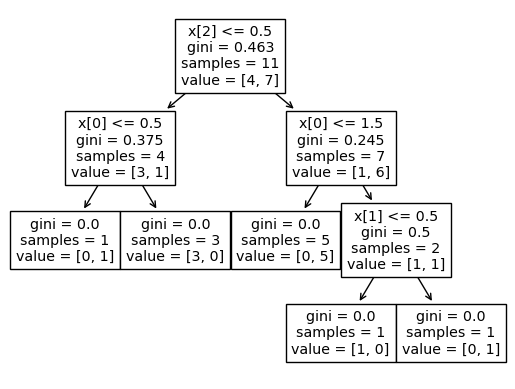

In [26]:
tree.plot_tree(classifier)